<a href="https://colab.research.google.com/github/Vinicius-L-R-Matos/-Repositorio-DS/blob/master/_notebooks/2021_11_20_Feature_Engineering_Dados_SPOTIFY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering Dados SPOTIFY Músicas de 1921 - 2020

Iremos realizar uma exploração sobre os dados vistos anteriormente do spotify, para visuaalização de gráficos iremos utilizar o **SEABORN** e o **MATPLOTLIB**

Abaixo Documentações:

- [Matplotlib](https://matplotlib.org/stable/tutorials/index.html#introductory)
- [Seaborn](https://seaborn.pydata.org/tutorial.html)


Link : [SPOTIFY KEAGGLE](https://www.kaggle.com/ektanegi/spotifydata-19212020?select=data.csv)

lembrar de conferir se arquivo csv está ok!

EDA: [Link EDA](https://colab.research.google.com/drive/1jBQY87-_Mp5DL9el1ot9g7A91up7l_q_?usp=sharing#scrollTo=F1ii-YgnV9wJ)

## Conclusões EDA


Músicas dançantes possuem melhor desempenho

Para uma modelagem futura poderiamos utilizar os dados:

Categoricos: Explicit, Key, Podendo uma das transformações ser a média uma vez que foi validada a diferença. 
Continuos: Energia, dançabilidade, acustica, loudness.

Como os dados se apresentam em diferentes escala pode ser interessante aplicar alguma normalização.

Podemos também utilizar a variavel de tempo e tratar o problema como uma séries temporal, pois é possivel ver alguns comportamentos de tendencia.



In [ ]:
!pip install -U seaborn
!pip install category_encoders

     |████████████████████████████████| 82 kB 450 kB/s 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
## ref - https://pythonguides.com/what-is-matplotlib-inline/
%matplotlib inline

In [ ]:
# Carrega Dataset
df = pd.read_csv("data.csv")
print(df.shape)
df.columns

(169909, 19)


Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
## Inspenção Rápida
df.sort_values(by='popularity', ascending=False, inplace=True)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


In [ ]:
df['duration_minute'] = df.duration_ms/1000/60

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
## Validação Campos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 87942 to 0
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  release_date      169909 non-null  object 
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  float64
 16  valence           169

In [ ]:
## Validação Missing Values
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration_minute     0
dtype: int64

In [ ]:
## Conversão Data e Criação de campo ano
df['release_date'] = pd.to_datetime(df['release_date'] )
df['year'] = df['release_date'].dt.year

## Remoção Outlier

In [ ]:
## Remoção Outlier por IQR
def iqr_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [ ]:
## Remoção Z-score
# Z-Score
def z_score_remove(df, col):
  z = np.abs(stats.zscore(df[col]))
  return df[(z < 2)]
  

In [ ]:
df.shape

(169909, 19)

In [ ]:
iqr_remove(df,'popularity').shape

(169909, 19)

In [ ]:
iqr_remove(df,'loudness').shape

(166243, 19)

In [ ]:
z_score_remove(df,'loudness').shape

(162894, 19)

In [ ]:
z_score_remove(df,'popularity').shape

(168111, 19)

In [ ]:
df = z_score_remove(df,'loudness')

## Transformações

In [ ]:
## O primeiro campo a modificar a escala é o target nossa popularidade que vai de 0-100
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
z_score = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler()

In [ ]:
## Target
df.popularity = min_max.fit_transform(df[['popularity']])

In [ ]:
df.loudness = z_score.fit_transform(df[['loudness']])

In [ ]:
df.tempo = robust.fit_transform(df[['tempo']])

In [ ]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minute
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0.000095,1,0.0897,1.020220,1,Blinding Lights,1.00,2020-03-20,0.0598,1.333789,0.334,2020,3.334000
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,0.000000,11,0.1010,0.587802,1,ROCKSTAR (feat. Roddy Ricch),0.99,2020-04-17,0.1640,-0.608595,0.497,2020,3.028883
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,0.000000,8,0.6960,0.414792,0,death bed (coffee for your head) (feat. beabad...,0.97,2020-02-08,0.1350,0.687055,0.348,2020,2.888883
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,0.000000,0,0.1570,0.653670,0,THE SCOTTS,0.96,2020-04-24,0.0514,0.350323,0.280,2020,2.766300
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,0.001880,11,0.3930,0.670992,0,ily (i love you baby) (feat. Emilee),0.95,2019-11-26,0.0892,-0.079466,0.330,2019,2.942450


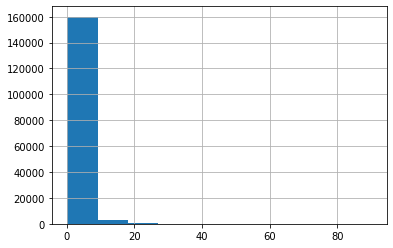

In [ ]:
df.duration_minute.hist()
plt.show()

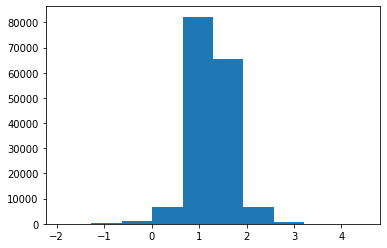

In [ ]:
plt.hist(np.log(df.duration_minute))
plt.show()

## Feature Selection

Selecionamos as features com base nos aprendizados vistos na EDA.

In [ ]:
col_features = ['acousticness','danceability','energy', 'valence', 'explicit', 'key', 'loudness']
target = ['popularity']

In [ ]:
df_features = df[col_features+target]
df_features.head()

,acousticness,danceability,energy,valence,explicit,key,loudness,popularity
87942,0.00146,0.514,0.730,0.334,0,1,1.020220,1.00
87940,0.24700,0.746,0.690,0.497,1,11,0.587802,0.99
87949,0.73100,0.726,0.431,0.348,0,8,0.414792,0.97
87941,0.23300,0.716,0.537,0.280,1,0,0.653670,0.96
87852,0.06860,0.674,0.774,0.330,0,11,0.670992,0.95


Transformação Variaveis Categoricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
one_hot = OneHotEncoder()

In [ ]:
temp_mode = pd.DataFrame(one_hot.fit_transform(df_features[['explicit']]).toarray(),columns=one_hot.get_feature_names(['explicit']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_features = df_features.drop(columns='explicit').join(temp_mode)

In [ ]:
df_features.head()

,acousticness,danceability,energy,valence,key,loudness,popularity,explicit_0,explicit_1
87942,0.00146,0.514,0.730,0.334,1,1.020220,1.00,1.0,0.0
87940,0.24700,0.746,0.690,0.497,11,0.587802,0.99,1.0,0.0
87949,0.73100,0.726,0.431,0.348,8,0.414792,0.97,1.0,0.0
87941,0.23300,0.716,0.537,0.280,0,0.653670,0.96,1.0,0.0
87852,0.06860,0.674,0.774,0.330,11,0.670992,0.95,1.0,0.0


In [ ]:
## Doc - https://contrib.scikit-learn.org/category_encoders/targetencoder.html
ta_encoder = TargetEncoder(cols='key')

In [ ]:
df_features['key'] = ta_encoder.fit_transform(df_features[['key']], df[['popularity']])

In [ ]:
df_features

,acousticness,danceability,energy,valence,key,loudness,popularity,explicit_0,explicit_1
87942,0.00146,0.514,0.7300,0.334,0.355246,1.020220,1.00,1.0,0.0
87940,0.24700,0.746,0.6900,0.497,0.355045,0.587802,0.99,1.0,0.0
87949,0.73100,0.726,0.4310,0.348,0.313790,0.414792,0.97,1.0,0.0
87941,0.23300,0.716,0.5370,0.280,0.313292,0.653670,0.96,1.0,0.0
87852,0.06860,0.674,0.7740,0.330,0.355045,0.670992,0.95,1.0,0.0
...,...,...,...,...,...,...,...,...,...
145186,0.99500,0.624,0.2050,0.306,0.250891,-2.461791,0.00,1.0,0.0
145185,0.99500,0.682,0.0680,0.872,0.337319,-0.334133,0.00,1.0,0.0
145183,0.80400,0.400,0.3800,0.490,0.250891,-0.417109,0.00,1.0,0.0
145181,0.99500,0.379,0.0883,0.514,0.323212,-1.896354,0.00,1.0,0.0


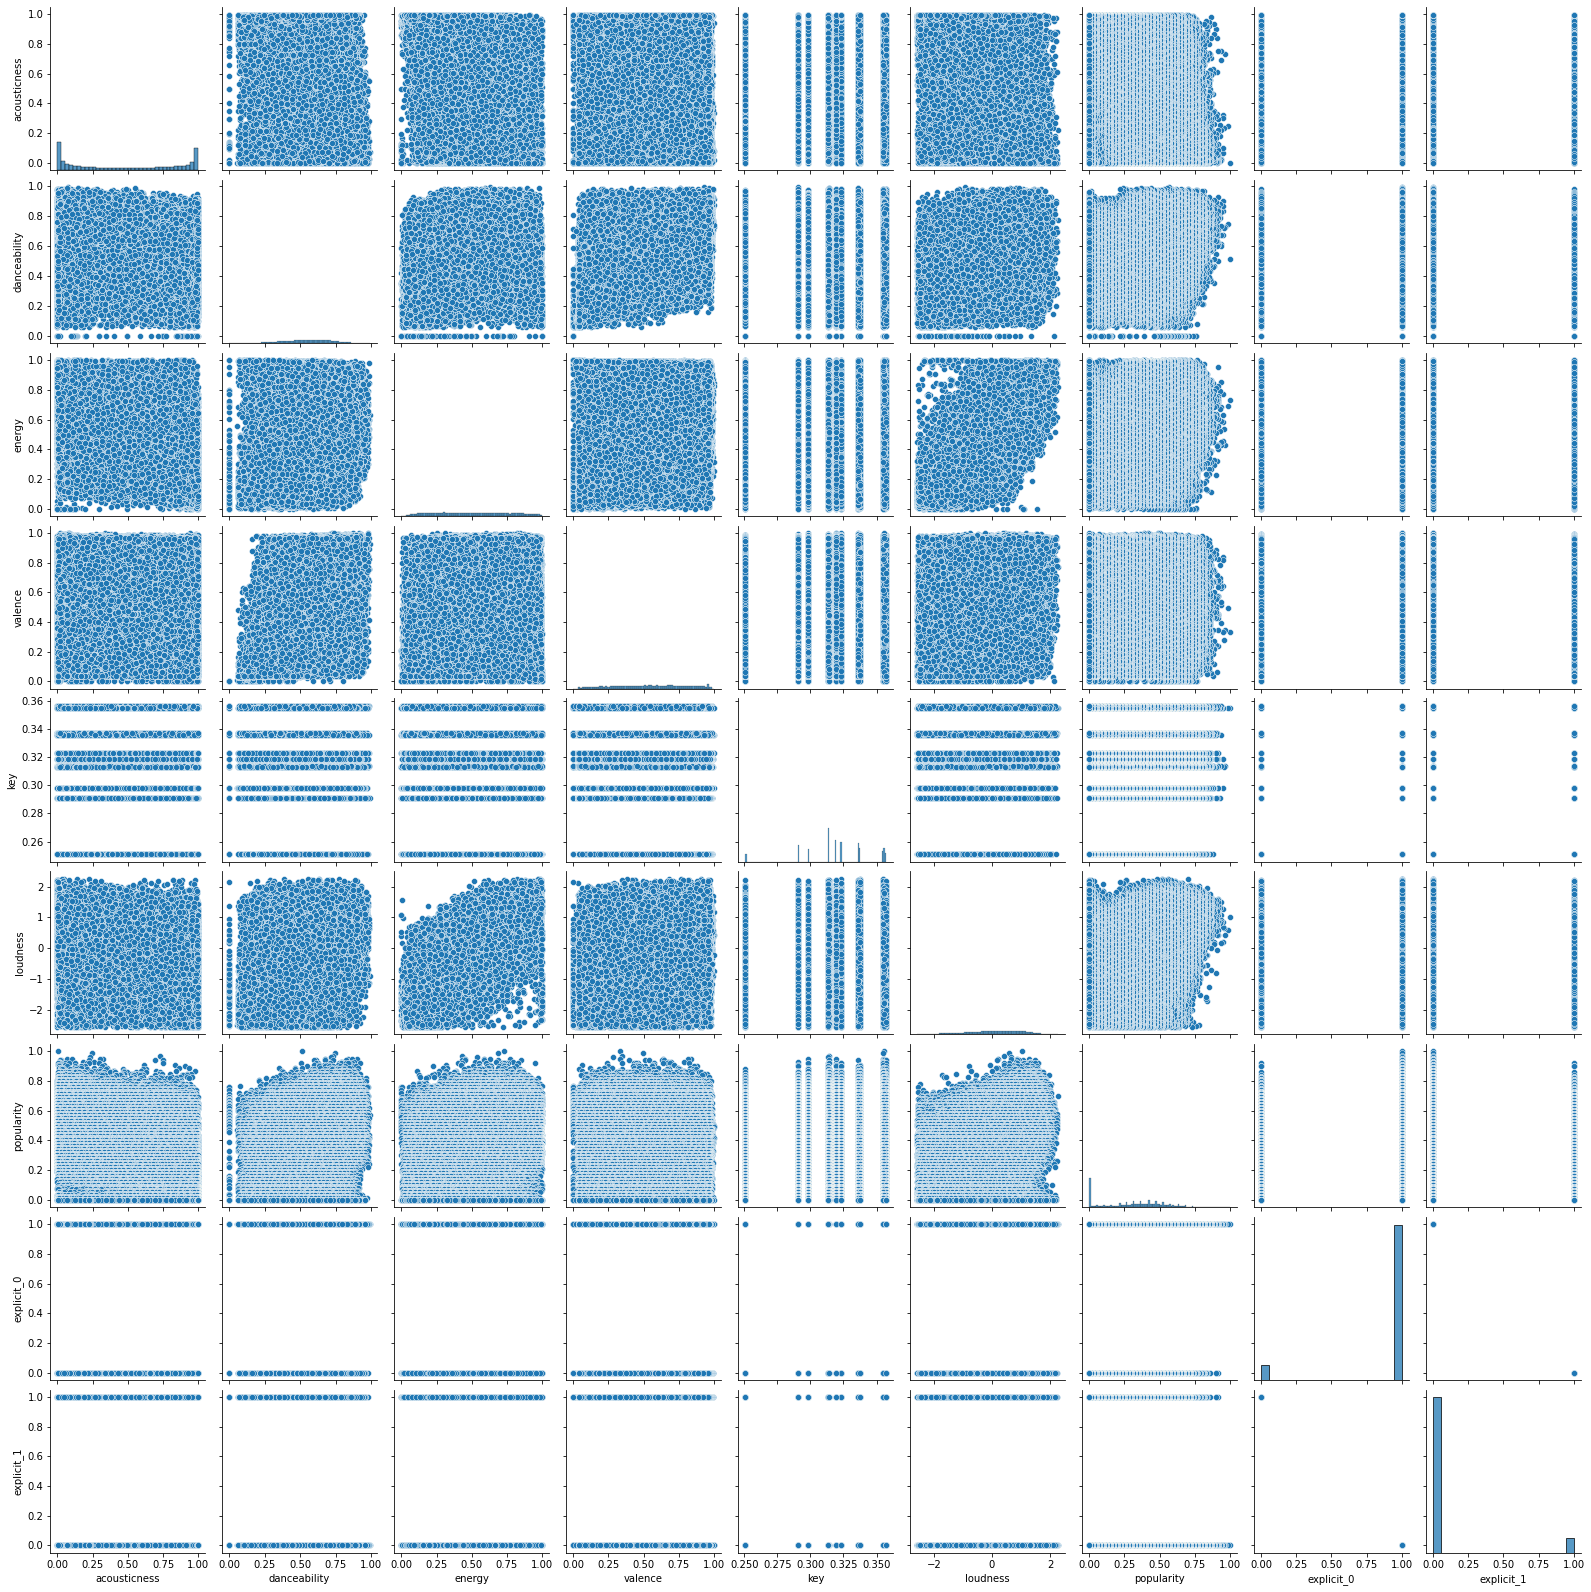

In [ ]:
sns.pairplot(df_features)
plt.show()

In [ ]:
df_features.to_csv('features_spotify', index=False)